In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C203ThinF_IMG_20151029_102123_cell_51.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C238NThinF_IMG_20151207_114038_cell_84.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C119P80ThinF_IMG_20151002_124304_cell_112.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C39P4thinF_original_IMG_20150622_111723_cell_33.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C101P62ThinF_IMG_20150918_151149_cell_63.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C180P141NThinF_IMG_20151201_165601_cell_115.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C95P56ThinF_IMG_20150821_171603_cell_75.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfected/C236ThinF_IMG_20151127_102516_cell_177.png
/kaggle/input/cell-images-for-detecting-malaria/cell_images/Uninfecte

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [5]:
import os

# Path to the dataset
data_path = '/kaggle/input/cell-images-for-detecting-malaria/cell_images'

# Get categories (subfolders inside the data_path, exclude the 'cell_images' folder itself)
categories = [folder for folder in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, folder)) and folder != 'cell_images']

# Create a dictionary to map category name to label
labels = [i for i in range(len(categories))]
label_dict = dict(zip(categories, labels))

# Print label dictionary, categories, and labels
print(label_dict)
print(labels)
print(categories)


{'Uninfected': 0, 'Parasitized': 1}
[0, 1]
['Uninfected', 'Parasitized']


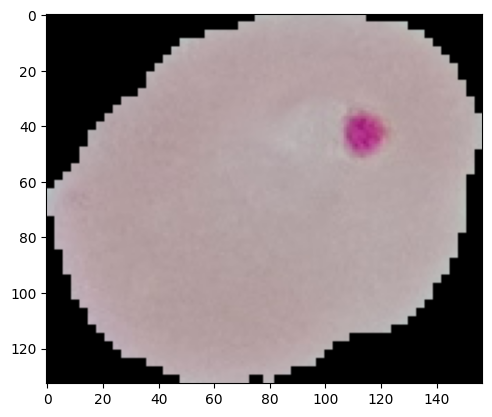

In [8]:
img = cv2.imread('/kaggle/input/cell-images-for-detecting-malaria/cell_images/Parasitized/C167P128ReThinF_IMG_20151201_105707_cell_234.png')
plt.imshow(img)

In [9]:
img.shape

(133, 157, 3)

In [10]:
img_size = 100
data = []
target = []

for category in categories:
    folder_path = os.path.join(data_path, category)
    img_names = os.listdir(folder_path)
    
    for img_name in img_names:
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
    
        try:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            resized = cv2.resize(gray, (img_size,img_size))
            data.append(resized)
            target.append(label_dict[category])
        except Exception as e:
            print('Exception:', e)

Exception: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Exception: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'



In [11]:
import numpy as np

data = np.array(data)/255
data = np.reshape(data, (data.shape[0], img_size,img_size,1))

target = np.array(target)

In [12]:
from keras.utils import to_categorical
new_target = to_categorical(target)

In [13]:
new_target

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dropout, Dense

In [15]:
model = Sequential([
    Conv2D(200,(3,3),input_shape=data.shape[1:], activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(100,(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, new_target,test_size=0.2)

In [17]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((22046, 100, 100, 1), (5512, 100, 100, 1), (22046, 2), (5512, 2))

In [18]:
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 32s 37ms/step - accuracy: 0.5660 - loss: 0.6825
Epoch 2/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.6682 - loss: 0.6043
Epoch 3/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.8750 - loss: 0.3157
Epoch 4/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.9418 - loss: 0.1705
Epoch 5/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - accuracy: 0.9511 - loss: 0.1473
Epoch 6/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - accuracy: 0.9529 - loss: 0.1362
Epoch 7/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - accuracy: 0.9559 - loss: 0.1281
Epoch 8/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - accuracy: 0.9565 - loss: 0.1189
Epoch 9/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - accuracy: 0.9633 - loss: 0.1054
Epoch 10/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - accuracy: 0.9663 - loss: 0.0932


In [19]:
model.evaluate(x_test, y_test)

173/173 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9492 - loss: 0.1454


[0.1473841518163681, 0.949201762676239]